In [162]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [312]:
concentrations = pd.read_csv('Concentrations_Diversity.csv', sep = ",", low_memory=False)
concentrations

,Subject Number,Handedness,Hand,Subject,1-Chlorononane,1-nonanol,1-Octadecene,"2,4-Diisopropylphenol",alpha-amylcinnamaldehyde,alpha-hexylcinnameldehyde,...,Pentadecane,Pristane,Tetradecane,Tetradecanoic acid,Undecanoic Acid,Isopropyl Palmitate,Isoamyl Salicylate,Decanoic Acid,Octacosane,Diversity
0,M3-100818-LH,R,L,1,0,0.624539,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.663282,0.000000,2.347639,0,0.750517,0,0.000000,0.000000,13
1,M3-100818-RH,R,R,1,0,0.590086,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.810394,0,0.606584,0,0.000000,0.000000,12
2,M13-100818-LH,R,L,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.559956,0.000000,1.008170,0,0.000000,0,0.000000,0.000000,11
3,M13-100818-RH,R,R,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,2
4,M14-100818-LH,R,L,3,0,0.514102,0.000000,0.000000,0.000000,0.000000,...,1.027994,0.616981,0.000000,0.625230,0,0.000000,0,0.000000,0.000000,13
5,M14-100818-RH,R,R,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,5
6,F5-092718-LH,R,L,4,0,0.000000,0.000000,0.000000,0.729253,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.643682,4
7,F5-092718-RH,R,R,4,0,0.500433,0.573010,0.000000,3.065261,0.542375,...,0.000000,0.000000,0.000000,0.834334,0,0.000000,0,0.000000,0.000000,12
8,F10-092718-LH,R,L,5,0,0.000000,0.000000,0.000000,1.627104,0.000000,...,1.570422,0.000000,0.000000,0.531473,0,0.000000,0,0.000000,0.000000,9
9,F10-092718-RH,R,R,5,0,0.688575,0.692658,0.000000,3.822383,0.498764,...,1.839609,0.615896,0.000000,2.076128,0,0.000000,0,0.000000,0.816244,17


In [313]:
if isinstance(concentrations, pd.DataFrame):
        print ("This is a Dataframe");

This is a Dataframe


In [314]:
features = ['1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid', 'heptadecane',
       'Hexadecane ', 'Hexyl salicylate', 'Isopropyl Myristate',
       'Methyl Decanoate', 'Methyl palmitate', 'Napthalene', 'Nonanal',
       'Octadecane', 'Pentadecane', 'Pristane', 'Tetradecane',
       'Tetradecanoic acid', 'Undecanoic Acid', 'Isopropyl Palmitate',
       'Isoamyl Salicylate', 'Decanoic Acid', 'Octacosane']
x = concentrations.loc[:, features].values
x

array([[ 0.        ,  0.62453941,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  4.37431508,  0.        ,  4.95022494,
         1.76883448,  1.02670354,  0.        ,  0.91773582,  0.        ,
         1.04214087,  0.        ,  1.57240809,  1.99920598,  0.        ,
         0.66328163,  0.        ,  2.34763913,  0.        ,  0.75051669,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.59008575,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  3.9672146 ,  0.        ,  1.96833542,
         0.8303645 ,  0.        ,  0.        ,  0.96694095,  5.6920586 ,
         0.81862087,  0.        ,  1.54983456,  0.95628112,  0.        ,
         0.        ,  0.        ,  1.81039355,  0.        ,  0.60658441,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  3.69428972,  0.        ,  1.15711555,
         1.31891442,  0.8562

In [315]:
y = concentrations.loc[:,['Subject']].values
y

array([[ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [10],
       [10]])

In [316]:
pd.DataFrame(data = x, columns = features).head()

,1-Chlorononane,1-nonanol,1-Octadecene,"2,4-Diisopropylphenol",alpha-amylcinnamaldehyde,alpha-hexylcinnameldehyde,Benzophenone,Decanal,Dibutyl Phthalate,Dodecanoic acid,...,Octadecane,Pentadecane,Pristane,Tetradecane,Tetradecanoic acid,Undecanoic Acid,Isopropyl Palmitate,Isoamyl Salicylate,Decanoic Acid,Octacosane
0,0.0,0.624539,0.0,0.0,0.0,0.0,0.0,4.374315,0.0,4.950225,...,1.999206,0.000000,0.663282,0.0,2.347639,0.0,0.750517,0.0,0.0,0.0
1,0.0,0.590086,0.0,0.0,0.0,0.0,0.0,3.967215,0.0,1.968335,...,0.956281,0.000000,0.000000,0.0,1.810394,0.0,0.606584,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.694290,0.0,1.157116,...,1.136842,0.000000,0.559956,0.0,1.008170,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.514102,0.0,0.0,0.0,0.0,0.0,2.338111,0.0,1.371107,...,1.287055,1.027994,0.616981,0.0,0.625230,0.0,0.000000,0.0,0.0,0.0


In [317]:
pca = PCA(n_components=2)

In [318]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(Ys)

In [319]:
traces = []

for name in features:

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout, figsize=(30, 30))
py.iplot(fig)

NameError: name 'Scatter' is not defined

ValueError: x and y must be the same size

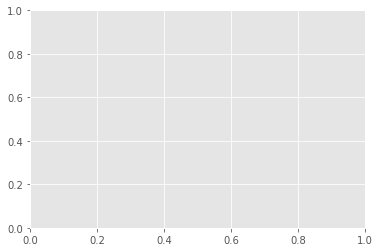

In [320]:
import matplotlib
import numpy as np

X = concentrations.loc[:,['Subject']].values
features = ['1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid']
Ys = concentrations.loc[:, features].values

nCols = len(X)  
nRows = Ys.shape[0]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Ys)))

cs = [colors[i//len(X)] for i in range(len(Ys)*len(X))] #could be done with numpy's repmat
Xs=X*nRows #use list multiplication for repetition
matplotlib.pyplot.scatter(Xs,Ys.flatten(),color=cs)


No handles with labels found to put in legend.


ValueError: x and y must be the same size

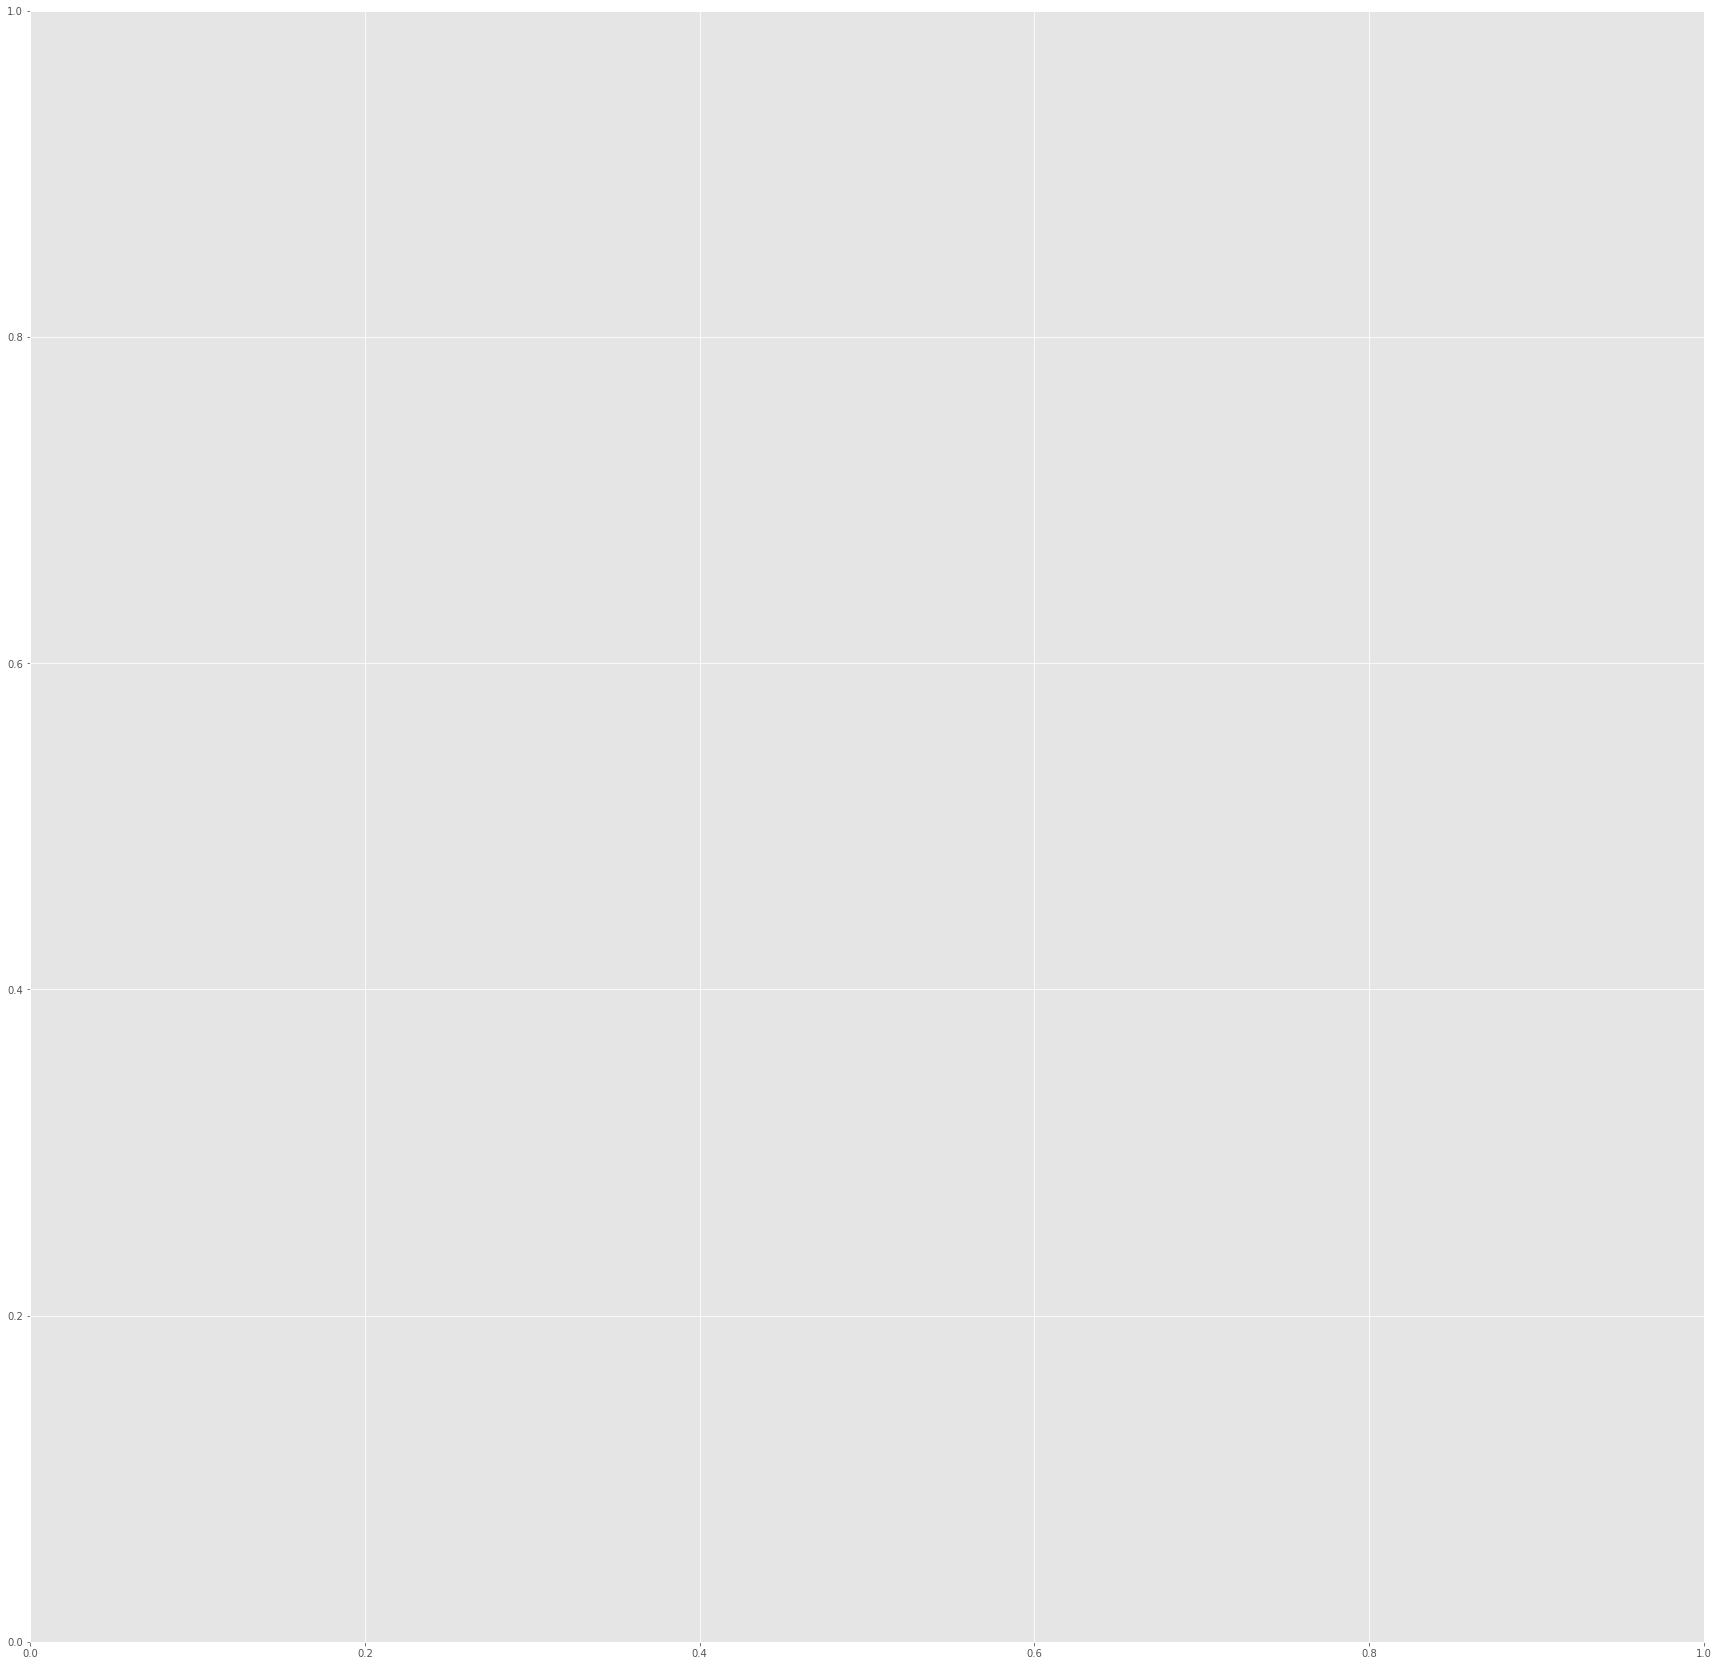

In [321]:
X = concentrations.loc[:,['Subject']].values
features = ['1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid', 'heptadecane',
       'Hexadecane ', 'Hexyl salicylate', 'Isopropyl Myristate',
       'Methyl Decanoate', 'Methyl palmitate', 'Napthalene', 'Nonanal',
       'Octadecane', 'Pentadecane', 'Pristane', 'Tetradecane',
       'Tetradecanoic acid', 'Undecanoic Acid', 'Isopropyl Palmitate',
       'Isoamyl Salicylate', 'Decanoic Acid', 'Octacosane']
Y = concentrations.loc[:, features].values
labels = range(1,len(X)+1)

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])


ax.legend(fontsize='small')

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111)
for x,y,lab in zip(X,Y,labels):
        ax.scatter(x,y,label=lab)

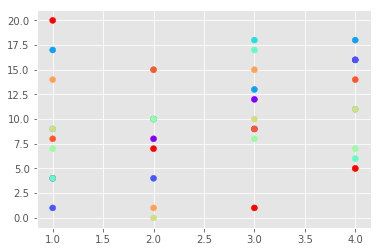

In [322]:

X = [1,2,3,4]
Ys = np.array([[4,8,12,16],
      [1,4,9,16],
      [17, 10, 13, 18],
      [9, 10, 18, 11],
      [4, 15, 17, 6],
      [7, 10, 8, 7],
      [9, 0, 10, 11],
      [14, 1, 15, 5],
      [8, 15, 9, 14],
       [20, 7, 1, 5]])
nCols = len(X)  
nRows = Ys.shape[0]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Ys)))

cs = [colors[i//len(X)] for i in range(len(Ys)*len(X))] #could be done with numpy's repmat
Xs=X*nRows #use list multiplication for repetition
matplotlib.pyplot.scatter(Xs,Ys.flatten(),color=cs)

ValueError: x and y must be the same size

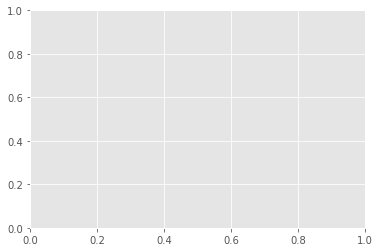

In [323]:
X = np.array([1,2,3,4,5,6,7,8,9,10])
features = ['1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid']
Ys = concentrations.loc[:, features].values
nCols = len(X)  
nRows = Ys.shape[0]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Ys)))

cs = [colors[i//len(X)] for i in range(len(Ys)*len(X))] #could be done with numpy's repmat
Xs=X*nRows #use list multiplication for repetition
matplotlib.pyplot.scatter(Xs,Ys.flatten(),color=cs)

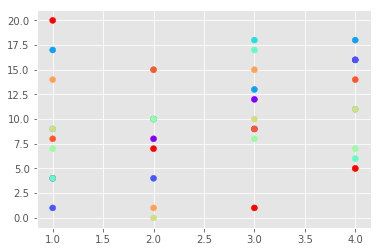

In [324]:
X = [1,2,3,4]
Ys = np.array([[4,8,12,16],
      [1,4,9,16],
      [17, 10, 13, 18],
      [9, 10, 18, 11],
      [4, 15, 17, 6],
      [7, 10, 8, 7],
      [9, 0, 10, 11],
      [14, 1, 15, 5],
      [8, 15, 9, 14],
       [20, 7, 1, 5]])
nCols = len(X)  
nRows = Ys.shape[0]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Ys)))

cs = [colors[i//len(X)] for i in range(len(Ys)*len(X))] #could be done with numpy's repmat
Xs=X*nRows #use list multiplication for repetition
matplotlib.pyplot.scatter(Xs,Ys.flatten(),color=cs)

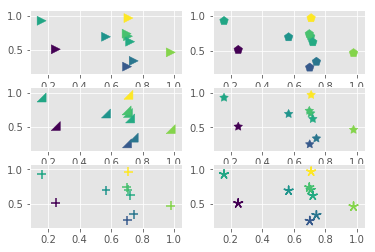

In [325]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()

ValueError: x and y must be the same size

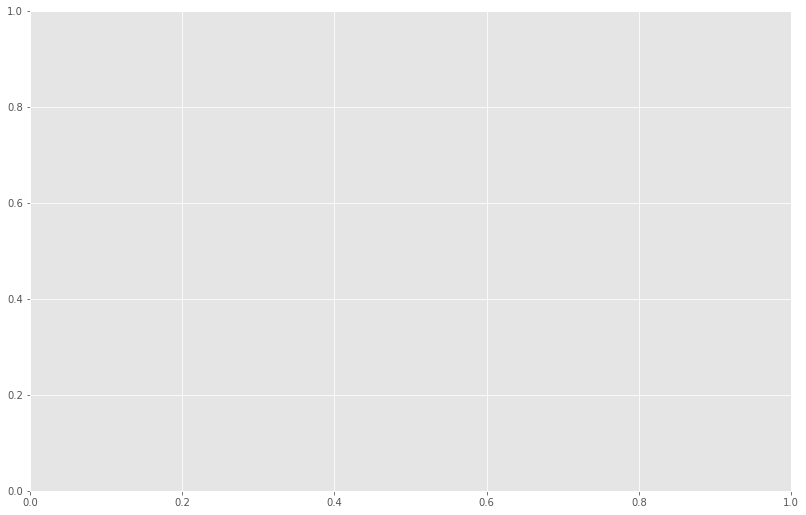

In [362]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 30))
x = Xs
y = Ys.flatten()
z = np.sqrt(Xs)

plt.subplot(321)
plt.scatter(x, y[0], s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()

ValueError: x and y must be the same size

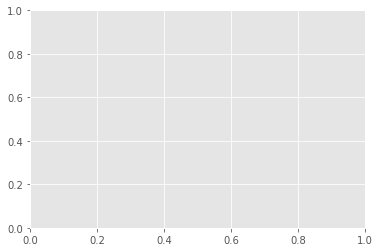

In [327]:
plt.scatter(X, Y[:,0], marker=(5, 2))

plt.show()

In [328]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
features = ['1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid', 'heptadecane',
       'Hexadecane ', 'Hexyl salicylate', 'Isopropyl Myristate',
       'Methyl Decanoate', 'Methyl palmitate', 'Napthalene', 'Nonanal',
       'Octadecane', 'Pentadecane', 'Pristane', 'Tetradecane',
       'Tetradecanoic acid', 'Undecanoic Acid', 'Isopropyl Palmitate',
       'Isoamyl Salicylate', 'Decanoic Acid', 'Octacosane']

projection = iso.fit_transform(concentrations.loc[:, features].values)

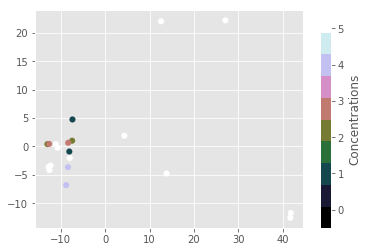

In [329]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=concentrations.Subject, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.colorbar(ticks=range(10), label='Concentrations')
plt.clim(-0.5, 5.5)

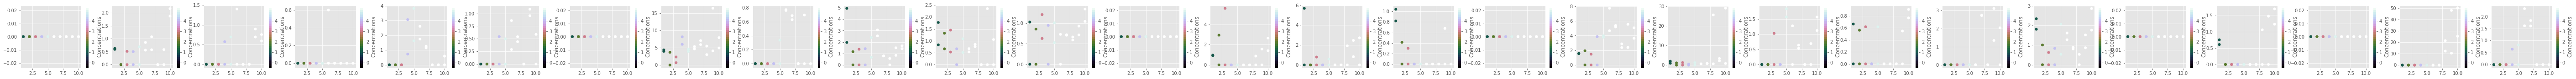

In [330]:
features = ['1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid', 'heptadecane',
       'Hexadecane ', 'Hexyl salicylate', 'Isopropyl Myristate',
       'Methyl Decanoate', 'Methyl palmitate', 'Napthalene', 'Nonanal',
       'Octadecane', 'Pentadecane', 'Pristane', 'Tetradecane',
       'Tetradecanoic acid', 'Undecanoic Acid', 'Isopropyl Palmitate',
       'Isoamyl Salicylate', 'Decanoic Acid', 'Octacosane']
counter = 1;

plt.figure(figsize=(100, 30))
for feature in features:
    plt.subplot(10, 28, counter)
    counter+=1
    plt.scatter(concentrations.loc[:,['Subject']].values, concentrations[feature], lw=0.1, c=concentrations.Subject, cmap=plt.cm.get_cmap('cubehelix', 28))
    plt.colorbar(ticks=range(5), label='Concentrations')
    plt.clim(-0.5, 5.5)

plt.show()

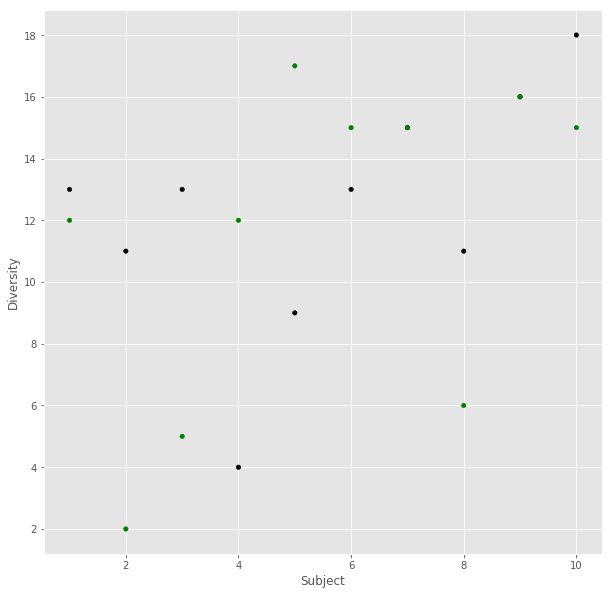

In [355]:
concentrations.plot.scatter(x='Subject', y='Diversity', legend=True, c=['black', 'green', 'black', 'green','black', 'green','black', 'green','black', 'green', 'black', 'green','black', 'green','black', 'green','black', 'green', 'black', 'green'], figsize=(10,10))

In [332]:
matplotlib.pyplot.scatter(concentrations['Subject'],concentrations[])

SyntaxError: invalid syntax (<ipython-input-332-2adb38109eb5>, line 1)

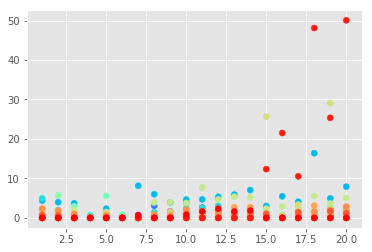

In [333]:
X = [1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Ys = np.array([
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0.624539413,0.590085747,0,0,0.514101725,0,0,0.500433092,0,0.688575478,0.856872285,0.55855658,0.574050512,1.074576854,0,0,0,0.581426688,2.161884038,1.874895677],
        [0,0,0,0,0,0,0,0.573010012,0,0.692658427,1.4028294,0,0,0,0,0,0.692825322,0.894853418,0.592489315,0.753984621],
        [0,0,0,0,0,0,0,0,0,0,0,0.598403,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0.72925312,3.065260536,1.627104025,3.822382501,2.613465175,1.749219998,1.149189781,1.265574737,0,0,0,0,0.589845894,0],
        [0,0,0,0,0,0,0,0.542375,0,0.498764,0.288083,0.859648,0.442191,0.540217,0,0,1.08359,0.956039,0,0.586652],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [4.374315084,3.967214599,3.694289725,0,2.338110764,0.683285785,8.131220265,5.98266741,3.946223756,4.618168071,4.665568936,5.327151376,5.899465955,7.048403141,3.014771582,5.47250474,4.083720208,16.39409618,4.938589144,7.907244089],
        [0,0,0,0,0,0,0,0,0,0.337070429,0.774406429,0.763050571,0.688685857,0.630974143,0,0,0,0.697072375,0,0],
        [4.950224944,1.968335417,1.157115548,0,1.371106607,0,0,1.418623607,0.666808587,2.401339958,2.542375805,3.06142818,0.785489648,0.792977647,0.559174659,0,0.840529991,1.495977356,1.424180067,1.66999094],
        [1.768834483,0.830364497,1.318914423,0.663482502,1.449266,0.528592884,0,0.664313,0.509064,1.084463,0.671282,0.534051,0.759839,0.84737,0,0,2.35057344,0,1.052782617,0],
        [1.026703544,0,0.856292558,0,1.208800362,0.626700309,0,0.946078,0.525011,1.007777,0,0.727359,0.718139,0.706506,0.589937,0.662829,0.927719,0.71409,1.043986,1.343995],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0.917735818,0.96694095,2.933674633,0,5.57803594,0,0,0,0,0,0,0,0,0,0.874475,0,1.566838,0,1.405993,2.648069],
        [0,5.692058605,0,0,0,0.794634958,0,0,0,0.5883405,0,0,0,0,1.921677,0,2.4662975,0.830503,2.7300255,0],
        [1.042140868,0.818620867,0.413978166,0,0.298649441,0,0,0,0,0,0,0,0,0,0,0,0,0.677496,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [1.572408088,1.549834559,1.933915441,0,1.470533088,0,0,3.857621762,3.985111508,3.785838657,7.72672921,4.670436347,5.381869428,5.186828247,2.370275946,2.878512621,2.391810749,5.542056958,3.636956995,5.06607346],
        [1.999205977,0.956281116,1.136841855,0,1.28705505,0,0,0.535975,0,1.24986,0.671282,0.534051,0.759839,0.84737,25.648704,0.670331,3.374301,2.178932,29.102695,0.837225],
        [0,0,0,0,1.027994297,0,0,0,1.570422,1.839609,0,1.275785,0.536801,0.638964,0,0,0,0.690525,1.123272,1.566752],
        [0.663281631,0,0.559955755,0,0.61698059,0,0,0,0,0.615896,0,0,0,0,0,0,0.5466555,0,0.9059955,0.764191],
        [0,0,0,0,0,0,0,0,0,0,0,0,2.72606,2.740798,0,0,1.347453,3.114908,2.046757,0],
        [2.347639133,1.810393546,1.008169868,0,0.625230353,0,0,0.834333577,0.531473276,2.076128417,1.621208168,1.275486047,0.883028437,0.807063696,0.529298322,0,0.865915206,1.51981,1.76476721,2.867453347],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0.750516691,0.606584414,0,0,0,0,0,0,0,0,0,0,0,0,1.055334,0,1.469721,0,1.694087,1.225649],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.3546409,21.5085478,10.53347115,48.10468735,25.35324724,50.06968317],
        [0,0,0,0,0,0,0.643682479,0,0,0.816244196,1.616876775,2.331352456,1.608575121,1.836280859,0,0,0,0,0,0]
])
nCols = len(X)  
nRows = Ys.shape[0]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Ys)))

cs = [colors[i//len(X)] for i in range(len(Ys)*len(X))] #could be done with numpy's repmat
Xs=X*nRows #use list multiplication for repetition
matplotlib.pyplot.scatter(Xs,Ys.flatten(), color=cs)

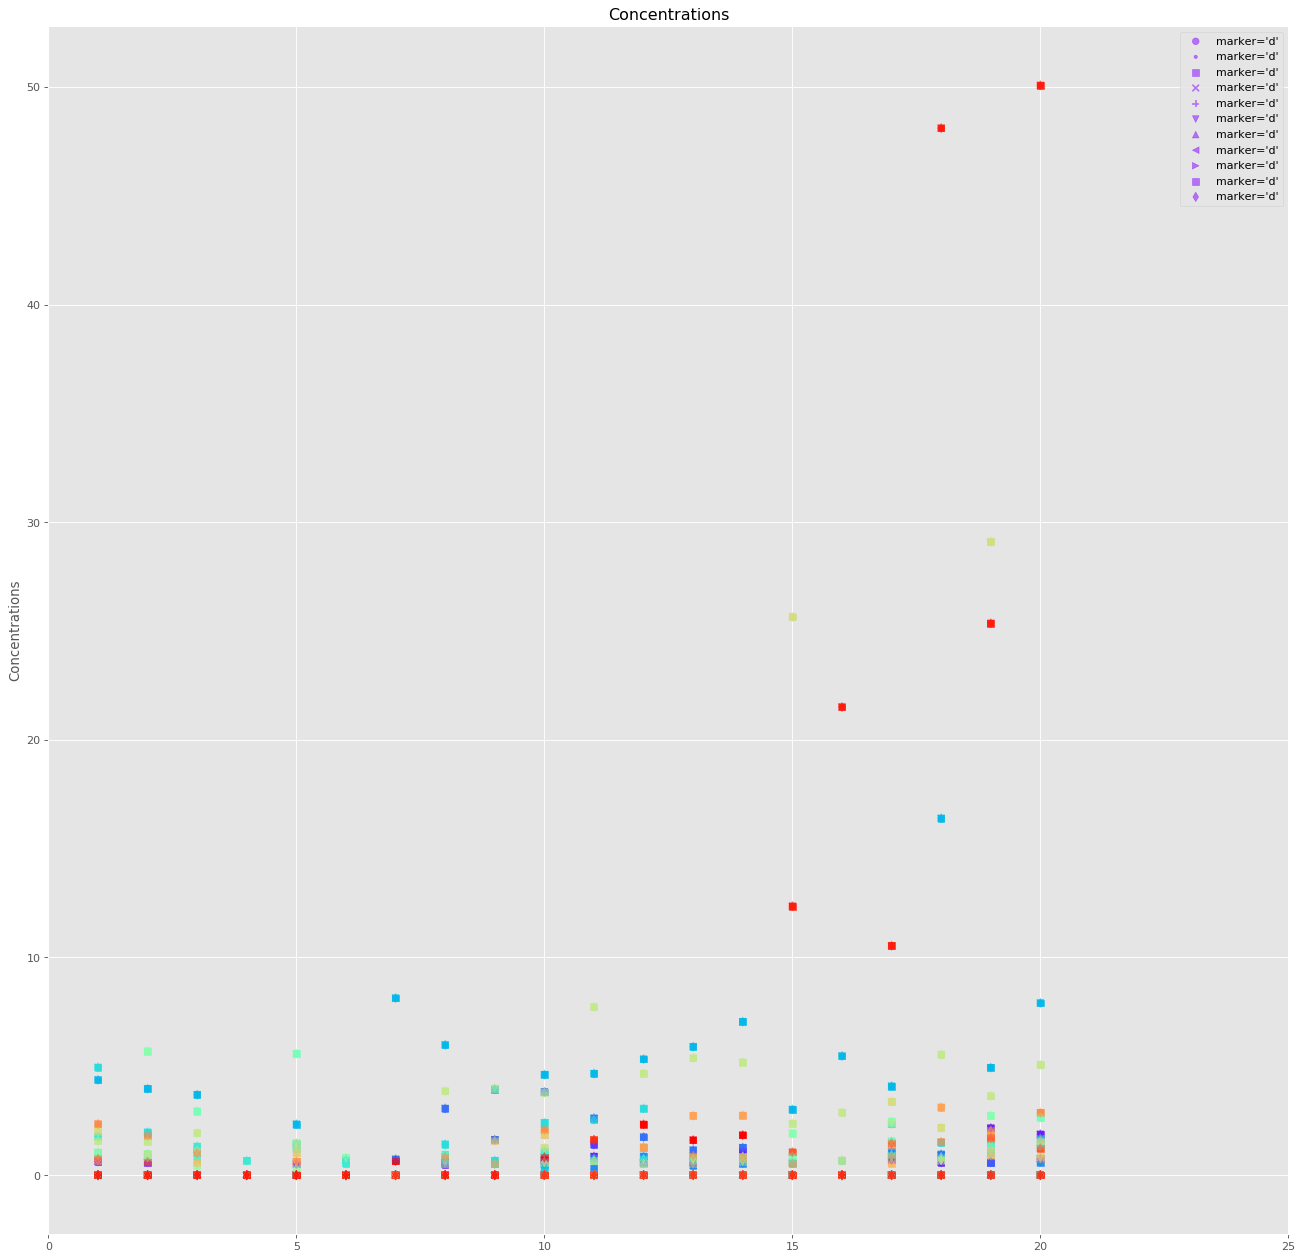

In [334]:
#for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
#    plt.plot(Xs,Ys.flatten(), marker, label="marker='{0}'".format(marker))
plt.figure(figsize=(20, 20), dpi=80)
for mark in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:    
    matplotlib.pyplot.scatter(Xs,Ys.flatten(), color=cs, alpha=0.5, marker=mark, label="marker='{0}'".format(marker))
plt.ylabel('Concentrations')
plt.title('Concentrations')  

plt.xlim(0, 25)
plt.legend(loc='upper right')

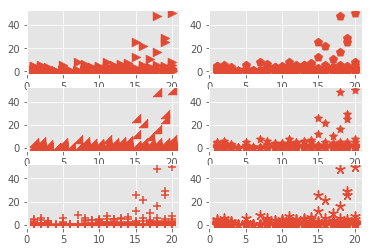

In [335]:
x = Xs
y = Ys

plt.subplot(321)
plt.scatter(x, y, s=80, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, marker=(5, 2))

plt.show()

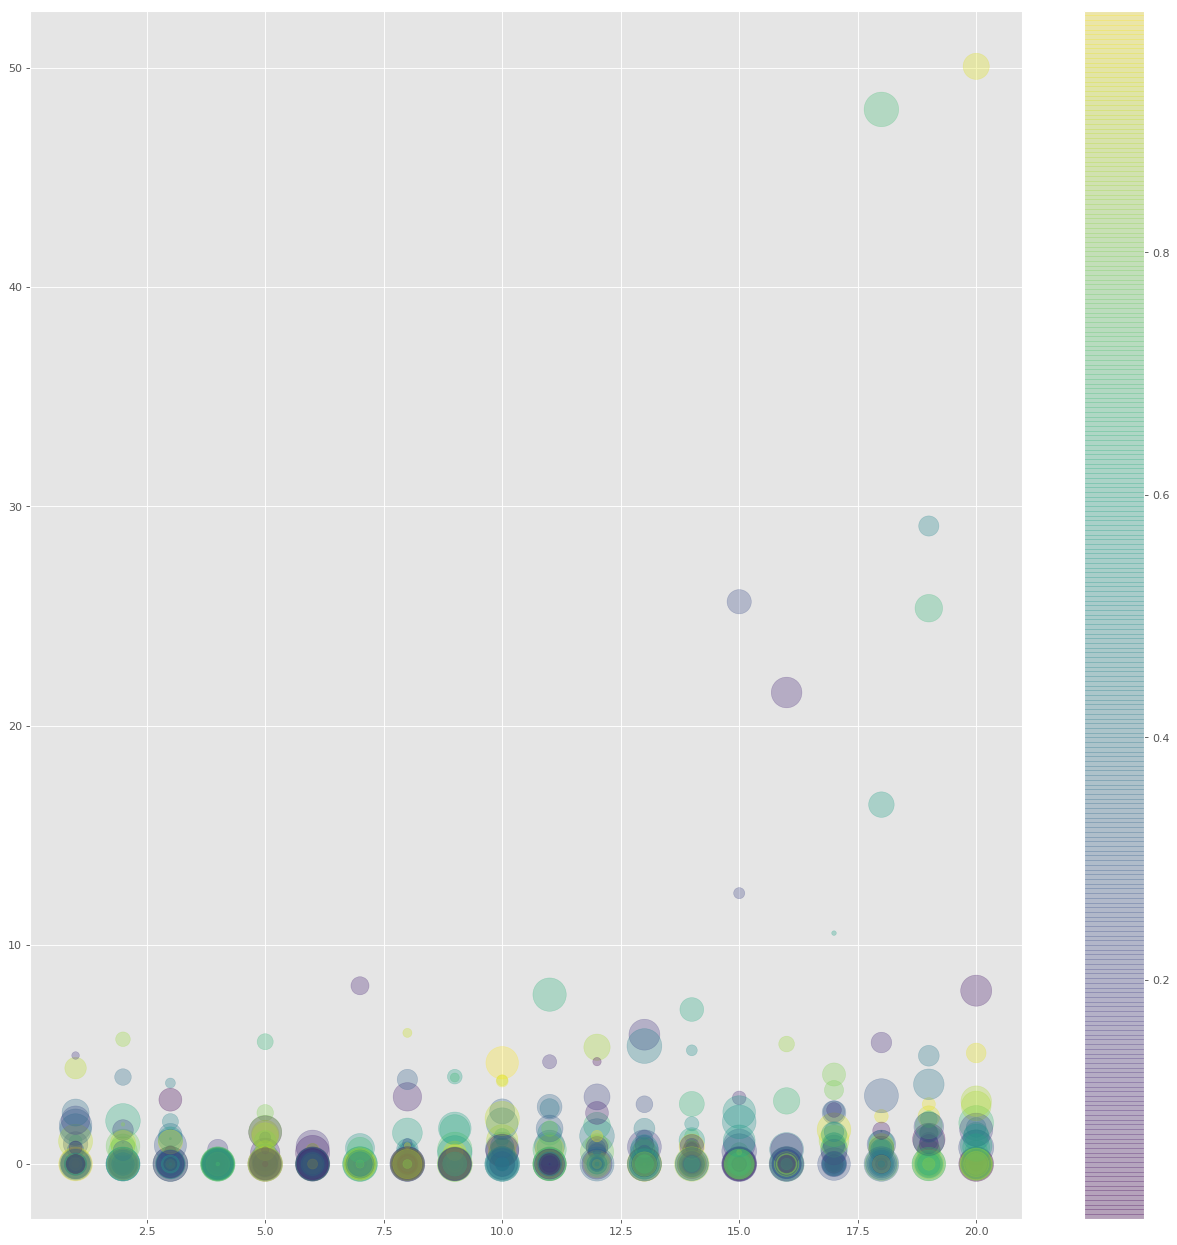

In [336]:
rng = np.random.RandomState(0)
x = Xs
y = Ys.flatten()
colors = rng.rand(560)
sizes = 1000 * rng.rand(560)
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();

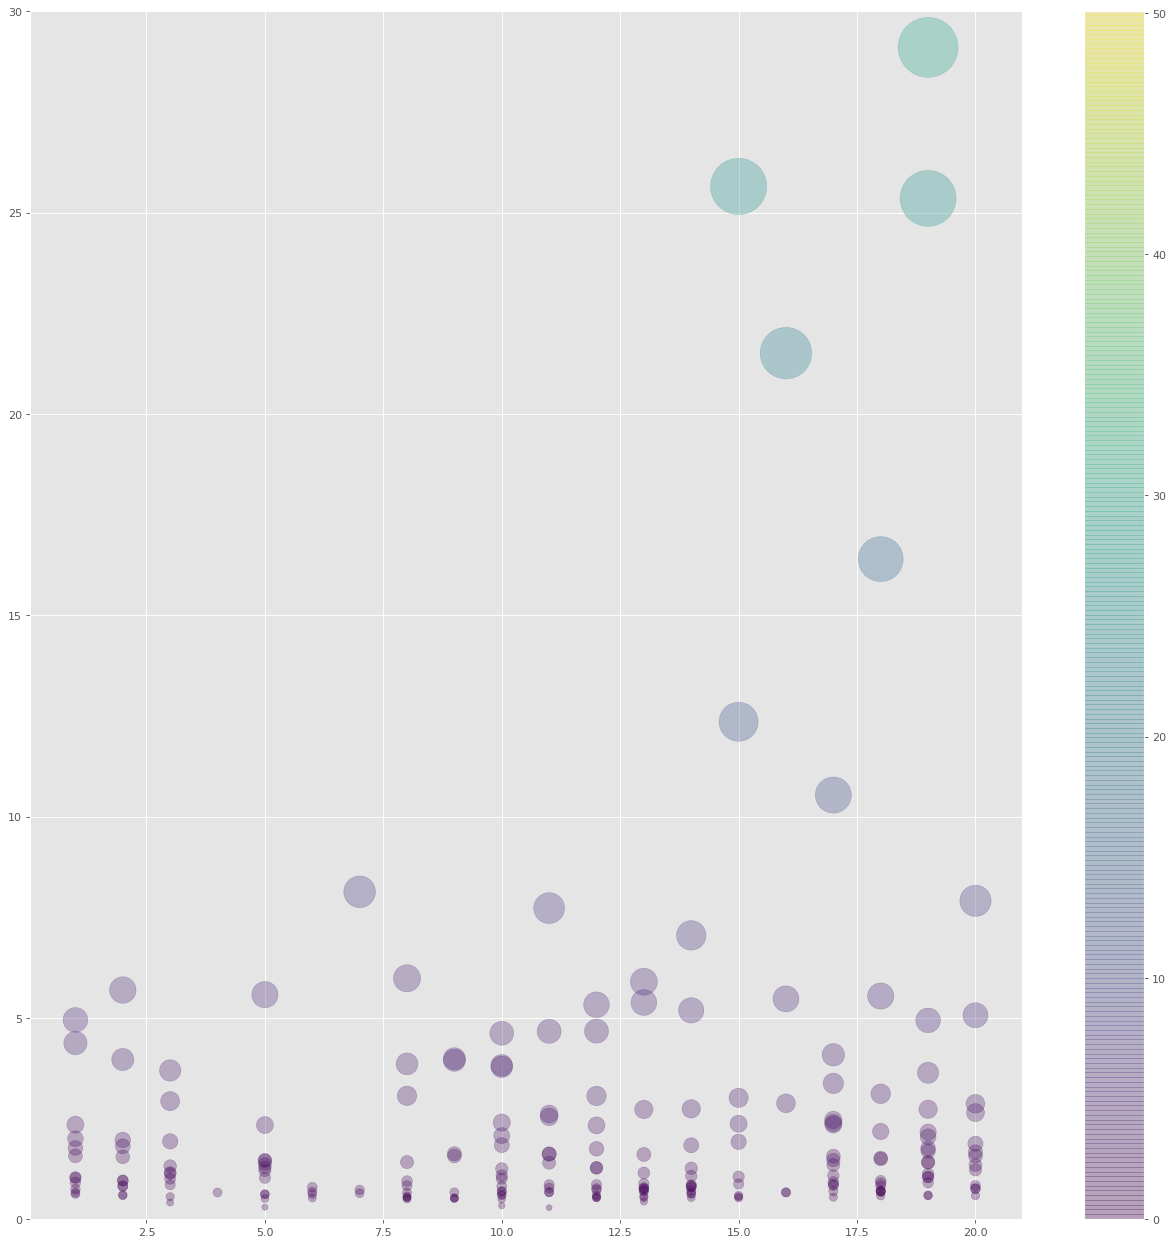

In [359]:
x = Xs
y = Ys.flatten()
colors = Ys.flatten()
sizes = Ys.flatten() * 100
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.ylim(0, 30)
plt.colorbar();

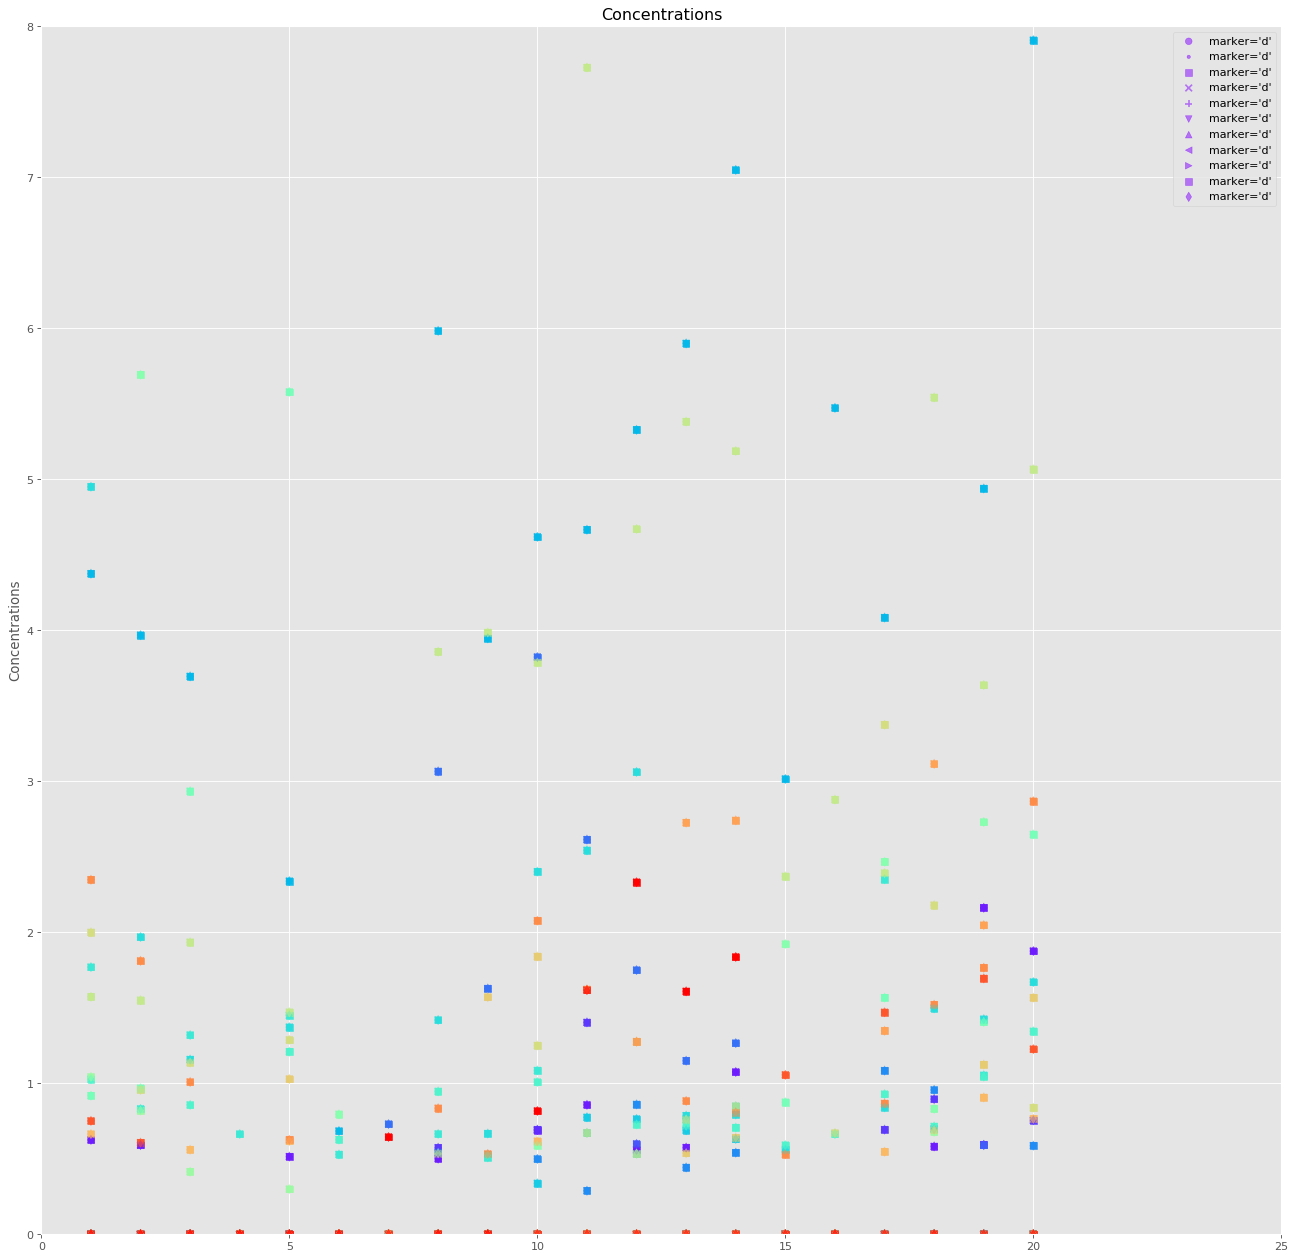

In [354]:
plt.figure(figsize=(20, 20), dpi=80)
for mark in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:    
    matplotlib.pyplot.scatter(Xs,Ys.flatten(), color=cs, alpha=0.5, marker=mark, label="marker='{0}'".format(marker))

    plt.ylabel('Concentrations')
plt.title('Concentrations')  

plt.xlim(0, 25)
plt.ylim(0,8)
plt.legend(loc='upper right')

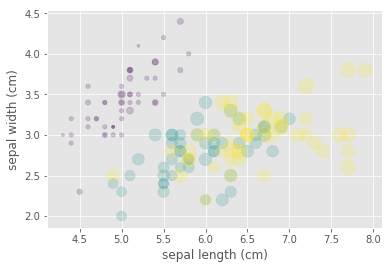

In [339]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [340]:

plt.scatter(Xs, Ys.flatten(), alpha=0.2,
            s=Concentrations['Diversity'], c=iris.target, cmap='viridis')
plt.xlabel("sef")
plt.ylabel("adflkj");

NameError: name 'Concentrations' is not defined

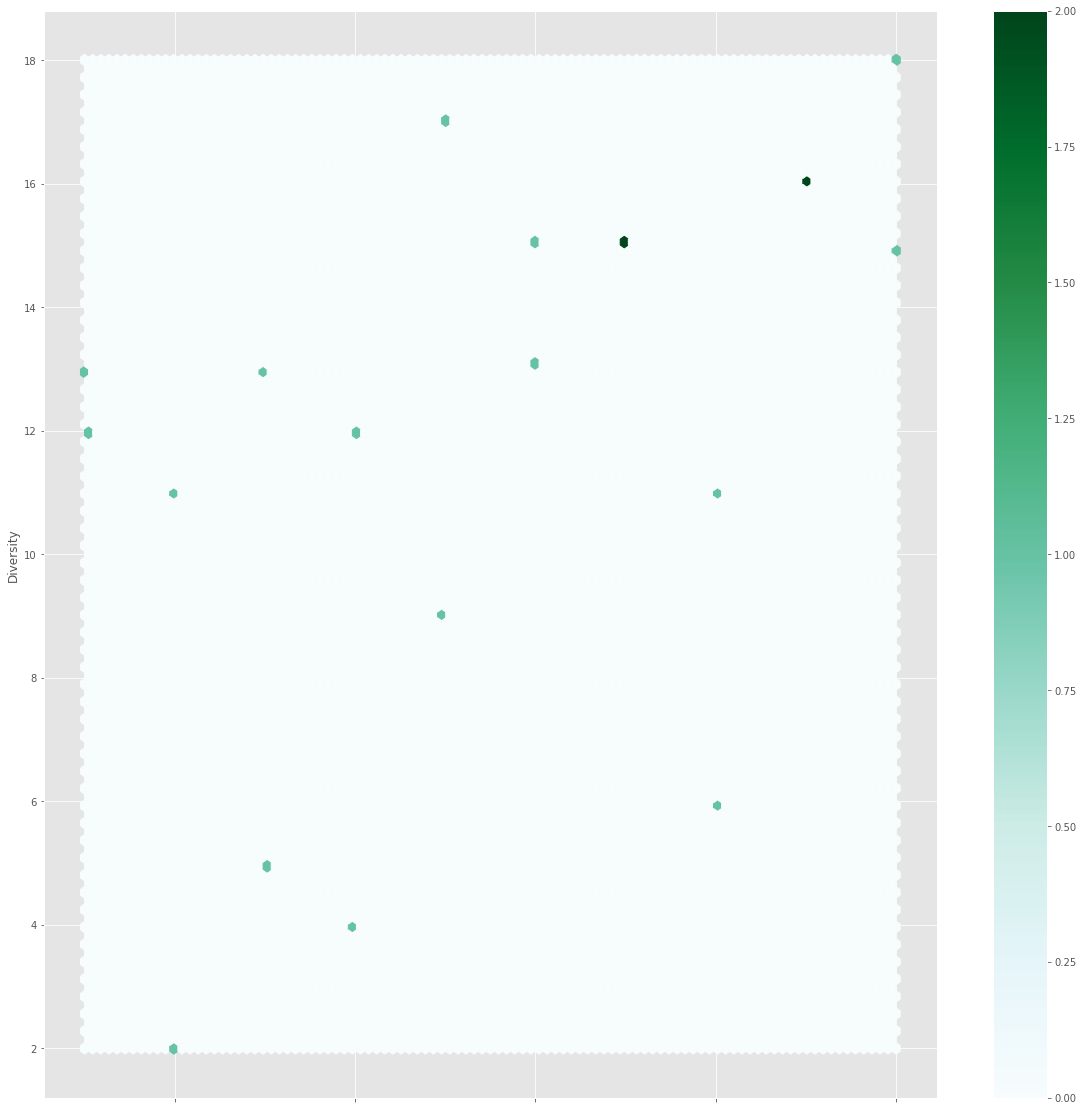

In [353]:
concentrations.plot.hexbin(x='Subject', y='Diversity', figsize=(20,20), legend=True)

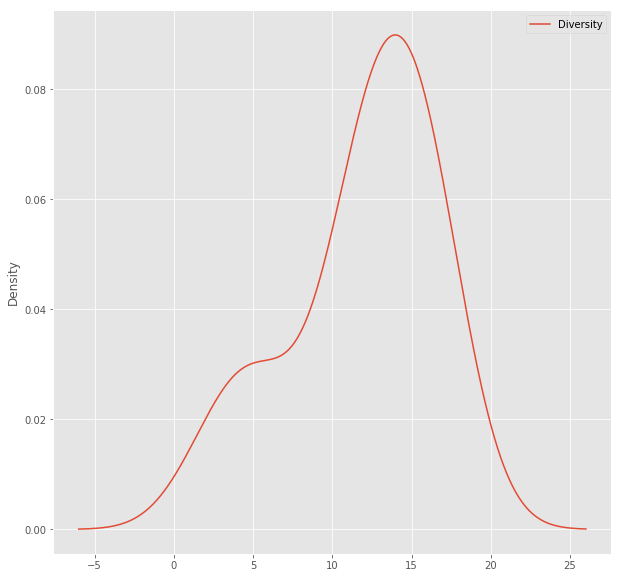

In [342]:
concentrations.plot.kde(x='Subject', y='Diversity', figsize=(10,10))

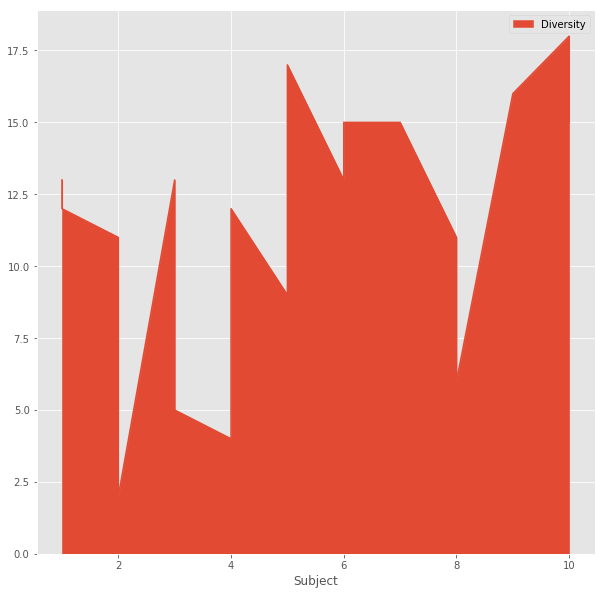

In [343]:
concentrations.plot.area(x='Subject', y='Diversity', figsize=(10,10))

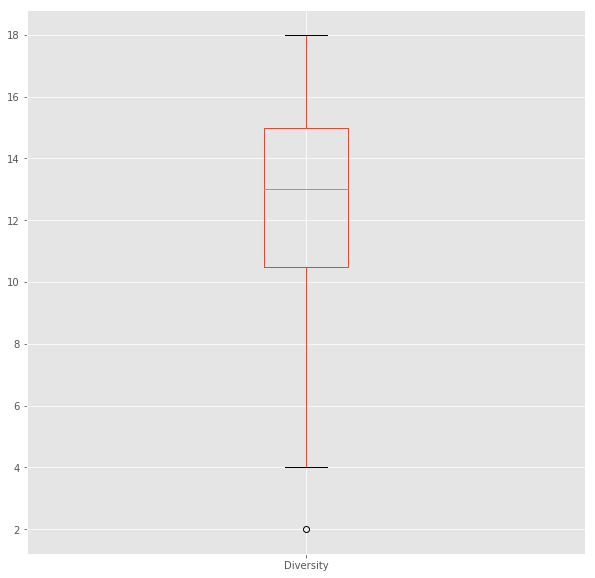

In [344]:
concentrations.plot.box(x='Subject', y='Diversity', figsize=(10,10))

In [349]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np # for generating random data
import cufflinks as cf

NameError: name 'Concentrations' is not defined

In [352]:
concentrations.iplot(kind='bar', barmode='stack', filename='cufflinks/stacked-bar-chart')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.